<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Alexia Marisol Diaz Verduzco & Frida María Hernández López

**Fecha:** 14 de octubre del 2021.

**Expediente** : if720500 & if720476
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/FridaHernandezL/ProyectoConjunto_Modulo2

# Proyecto TEMA-2

### 1.1 Simulación aplicada a clientes con tarjeta de crédito.

### 1.2 Objetivos.
> #### 1.2.1 Objetivo general.
>  - Presentar a la institución bancaria información valiosa y rentable para la toma de decisiones.


> #### 1.2.2 Objetivos específicos.
>  - Evaluar y simular el límite de crédito promedio para los clientes.
>  - Proyectar la categoría de la tarjeta más común dentro de la institución bancaria.   
>  - Determinar por medio de simulaciones el rango de edad al que conviene ofrecer futuras tarjetas de crédito.
>  - Analizar la conducta de los clientes en base al tiempo activo dentro de la institución. 

### 1.3 Definición del problema.

> Una tarjeta de crédito es un documento de material plástico o metal emitido por un banco o institución especializada a nombre de una persona, que podrá utilizarla para efectuar compras sin tener que pagar en efectivo y pudiendo, además, llevar el pago de los productos a períodos futuros, el usuario debe asumir la obligación de devolver el importe dispuesto y de pagar los intereses, comisiones bancarias y gastos.

> En muchos países sobretodo subdesarrollados el uso de tarjetas de crédito es un tema poco conocido así como también es común la desconfianza a las mismas. Sin embargo, por el rumbo profesional que ambas llevamos consideramos este tema como algo muy importante e interesante.  

> Entre los fénomenos financieros que se presentaron durante la pandemia como sociedad, predomina un deceso importante en las líneas de crédito; con este análisis queremos brindar a la institución en cuestión una visión más organizada sobre algunos de los aspectos de los clientes, para así ayudar a la toma de decisiones dentro de la financiera brindando una perspectiva más amplia, que optimicen las ventas e ingresos en el banco.

### 1.4 Nodos y variables que se decidieron simular y porqué

> Los nodos que decidimos simular son:


>  -  Límite de crédito 
>  -  Categoría de la tarjeta 
>  -  Edad del cliente
>  -  Tiempo activo

Conocer el **límite de crédito** promedio nos ayudará a visualizar como opera la institución financiera de forma interna, es decir, que cantidades promedio está autorizada a otorgar.  

El objetivo de proyectar la **categoría de la tarjeta** más común ayudará a comprender que cantidad de su cartera de clientes cuentan con características similares para obtener la misma.

La finalidad de conocer el rango de **edad** más frecuente, nos ayuda a visualizar posibles clientes de la institución que aun no cuentan con tarjeta de crédito y son candidatos a obtener una.  

Al analizar el **tiempo activo** de los clientes nos brindará información del comportamiento de los mismos, en otras palabras identificaremos en un futuro cuantos clientes activos tendrá la institución para que el banco tome decisiones respecto a su administración(valuación del riesgo). 

### Diagrama de flujo 

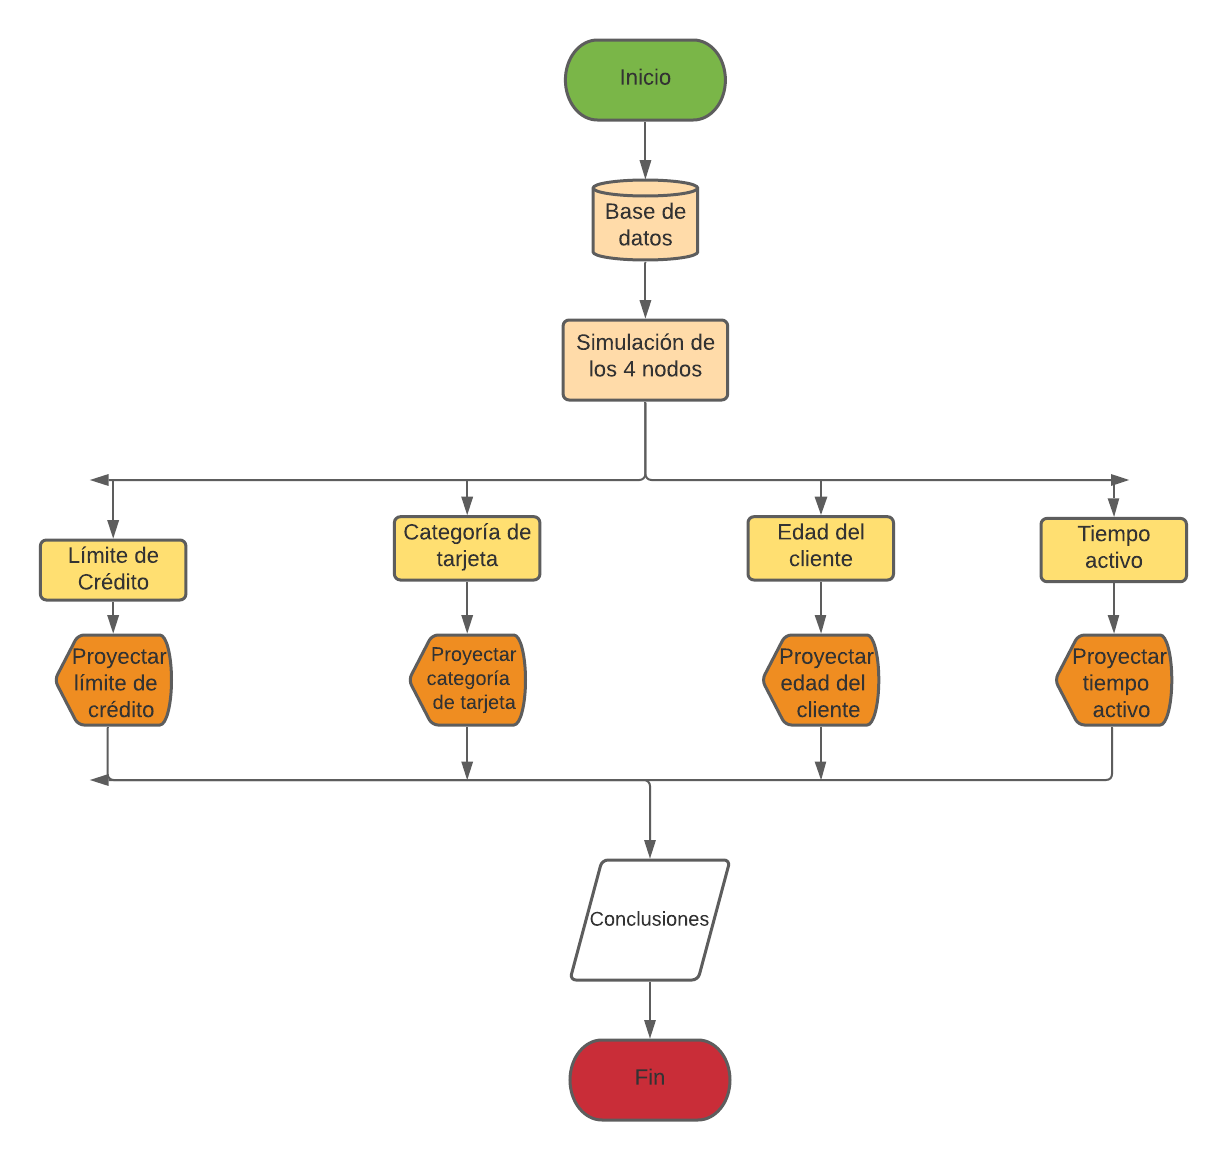

In [1]:
from IPython.display import Image
Image("Diagrama_Proyecto.PNG")

### 1.5 Definición de hipótesis y supuestos

> Supuestos Constantes 
>   -  El dólar estadounidense es la moneda base para el límite de crédito. 
>   -  La institución bancaria solamente cuenta con 4 tipos de tarjeta.
>   -  Los meses con tenencia de la cuenta bancaria serán tomados como 30 días.
>   -  Toda la información presentada es real. 
>   -  Las 4 variales a utilizar son las más relevantes para presentar a la institución.

> Hipótesis
>   -  Un 60% de los clientes cuentan con un límite de crédito igual o inferior al promedio.
>   -  La categoría de la tarjeta más común es la "Blue"
>   -  El rango de edad más común de los clientes se centra en personas en la etapa de la vida laborable o productiva.
>   -  Los clientes no perduran con su tarjeta de crédito más de 3 años. 

### 1.6 Obtención de la base de datos

### Librerías 

In [2]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st     
import statsmodels.api as sm 
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Base de datos normal 

aquí se explica de donde se obtuvo la base de datos
https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [3]:
data= pd.read_csv("BankChurners.csv")
data= data.set_index('ID_cliente')
data.head()

,Cuenta,Edad,Genero,Dependientes,Nivel_educativo,Estado_civil,Ingresos,Categoria_tarjeta,Meses_cuenta,Recuento_relaciones_total,...,Limite_credito,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
ID_cliente,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Base de datos a utilizar (limpia)

In [4]:
data = data[['Limite_credito','Categoria_tarjeta','Edad','Meses_cuenta']]
data.head()

,Limite_credito,Categoria_tarjeta,Edad,Meses_cuenta
ID_cliente,,,,
768805383,12691.0,Blue,45,39
818770008,8256.0,Blue,49,44
713982108,3418.0,Blue,51,36
769911858,3313.0,Blue,40,34
709106358,4716.0,Blue,40,21


### 1.7 Simulación nodos

In [5]:
def kde_scipy_1(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_2(x,bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_3(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [6]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [7]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 


def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()


#### NODO 1. Límite de crédito  

El primero nodo se caracteriza por el uso de la variable **límite de crédito**, el cual se define como la cantidad máxima que un cliente de la entidad financiera puede disponer al poseer una tarjeta de crédito.  

Debido a que el objetivo de un banco es colocar dinero, captado anteriormente del público, a tasas más elevadas; con este nodo se busca simular el promedio de límite de crédito que ayudará a estimar que cantidad de activos tendrá disponible una vez que el cliente salde su deuda, sumada a sus respectivos intereses. 

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

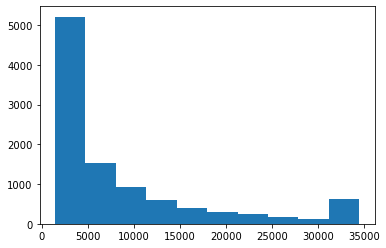

In [8]:
limites =  data['Limite_credito']
plt.hist(limites)

In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(limites)[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


In [10]:
limits = kde_scipy_1(data['Limite_credito'])
limits

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

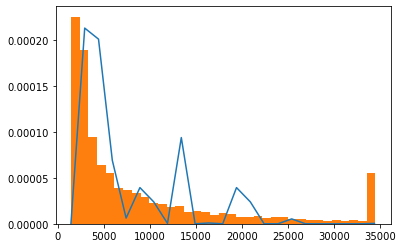

In [11]:
x_limite = np.arange(1430,34600,1500)
plt.figure()
plt.plot(x_limite,limits(x_limite))
plt.hist(limites,bins = 35, density = True)
plt.show()

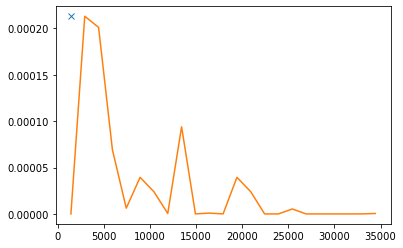

In [12]:
f = limits
x = np.arange(1430,34600,1500)
max_limit=(limits(x_limite)).max()

plt.plot(x_limite.min(),max_limit,'x',lw = 10)

plt.plot(x,limits(x))

### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [13]:
np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar
m=limites.max()

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_limits = acep_rechazo(f,max_limit,N,m,1)

In [14]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_limits.mean() )

La media de las variables aleatorias es de 8128.7472107728745


In [15]:
print('La media real de nuestros datos es de', data['Limite_credito'].mean() )

La media real de nuestros datos es de 8631.953698034848


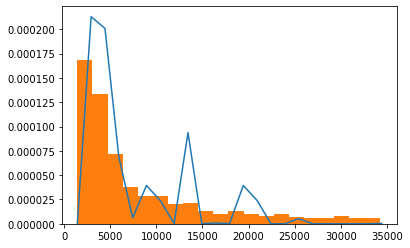

In [16]:
x = np.arange(1430,34600,1500)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_limits, bins = 20, density = True)
plt.show()

In [17]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = var_aleatorias_montecarlo_limits

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_prices = np.mean(X)


print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_prices)

error_positivos = abs(np.array(data['Limite_credito'].mean() - media_prices)/media_prices)
porcentaje=error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,
 (7655.340706326566, 8602.153715219183)
Media calculada por montecarlo crudo del numero de positivos 8128.7472107728745
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 6.19 %


# aqui empieza a valer madre

In [18]:
# y, x ,_ = plt.hist(data['Limite_credito'], bins=29, density=True, label='Data')
# x = x[1:]

# dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
# dist = dist[1:5] + ['gamma']
# error = pd.DataFrame(index=dist, columns=['error'])

# for d in dist:
#     params= getattr(st,d).fit(data['Limite_credito'])
#     y_hat = getattr(st, d)(*params).pdf(x)
#     error.loc[d]= ((y-y_hat)**2).mean()
#     plt.plot(x,y_hat, label=d)
    
# plt.legend()
# plt.show()

In [19]:
# error_k2=((y-limits(x_limite))**2).mean()
# #print('El error del kernel es de:',error_k2)

In [20]:
# nodo2_error = error.T
# nodo2_error['kernel'] = error_k2
# nodo2_error

In [21]:
# np.random.seed(123)
# #Estratificado
# N = 1000
# u = muestreo_est(N)
# funcion1 = lambda u: acep_rechazo(f,max_volumen,N,18,1)
# media1 = np.mean(funcion1(u))
# media1

#### NODO 2.  Categoría de la tarjeta

Según un estudio de la Comisión Nacional Bancaria y de Valores (CNBV), 7 de cada 10 personas utilizan una tarjeta de crédito en México, convirtiéndolas en el producto de crédito formal más utilizado.  
Las instituciones financieras otorgan tarjetas de crédito a las personas que cumplen con los requisitos para adquirirlas, dependiendo del nivel de riesgo del solicitante, el emisor asigna a cada cliente una línea de crédito. Dado lo anterior, el objetivo de conocer la **categoría de la tarjeta** más común en esta base de datos, será un factor importante para simular la cantidad de clientes que contará con ella en un futuro. 

(array([9436.,    0.,    0.,  116.,    0.,    0.,  555.,    0.,    0.,
          20.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

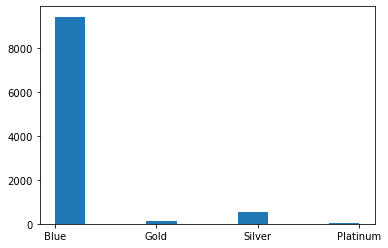

In [22]:
categoria =  data['Categoria_tarjeta']

plt.hist(categoria)

#### NODO 3. Edad cliente

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

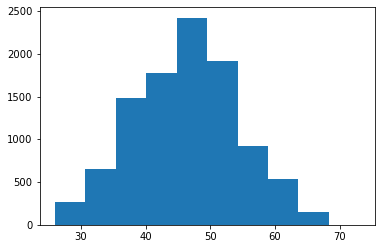

In [54]:
edad =  data['Edad']
plt.hist(edad)

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(edad)[:, None])
print(grid.best_params_)

{'bandwidth': 0.1}


In [56]:
edades = kde_scipy_1(data['Edad'])
edades

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

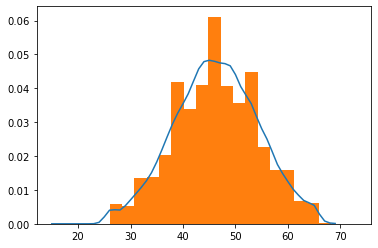

In [57]:
x_edad = np.arange(15,70,1)
plt.figure()
plt.plot(x_edad,edades(x_edad))
plt.hist(edad,bins =20, density = True)
plt.show()

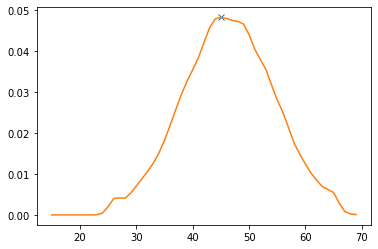

In [58]:
f = edades
x = np.arange(15,70,1)

max_edad = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(45,max_edad,'x',lw = 10)

plt.plot(x,edades(x))

#### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [59]:
np.random.seed(555)
N = 10000
var_aleatorias_montecarlo_edades = acep_rechazo(f,max_edad,N,70,1)

In [60]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_edades.mean())

La media de las variables aleatorias es de 46.3678420137756


In [61]:
print('La media real de nuestros datos es de', data['Edad'].mean() )

La media real de nuestros datos es de 46.32596030413745


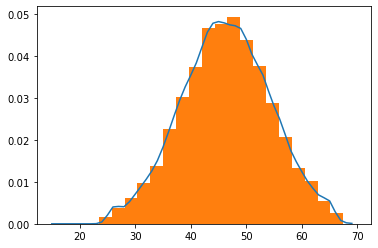

In [62]:
x = np.arange(15,70,1)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_edades, bins = 20, density = True)
plt.show()

#### Intervalo de Confianza y Error Porcentual

In [65]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95
X = var_aleatorias_montecarlo_edades

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_edades = np.mean(X)


print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del numero de positivos' ,media_edades)

error_positivos = abs(np.array(data['Edad'].mean() - media_edades)/media_edades)
porcentaje=error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del numero de positivos por montecarlo crudo  estará en el intervalo t normal,
 (46.21080470574586, 46.524879321805344)
Media calculada por montecarlo crudo del numero de positivos 46.3678420137756
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.09 %


#### Probando ajuste de distribuciones hipotéticas

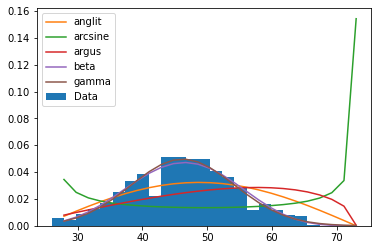

In [68]:
y, x ,_ = plt.hist(data['Edad'], bins=25, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:5] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Edad'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()


In [71]:
# error_k2=((y-edades(x_edad))**2).mean()
# #print('El error del kernel es de:',error_k2)

In [72]:
# nodo2_error = error.T
# nodo2_error['kernel'] = error_k2
# nodo2_error

In [73]:
params = st.beta.fit(x)
params

(0.40966161443612215,
 0.9485683447456038,
 27.879999999999995,
 46.08411917833379)

In [74]:
pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  783728678.3818626
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=783728678.3818626, pvalue=0.0)
Estadístico de chi_cuadrado =  27.58711163827534


#### Prueba de cuantil-cuantil

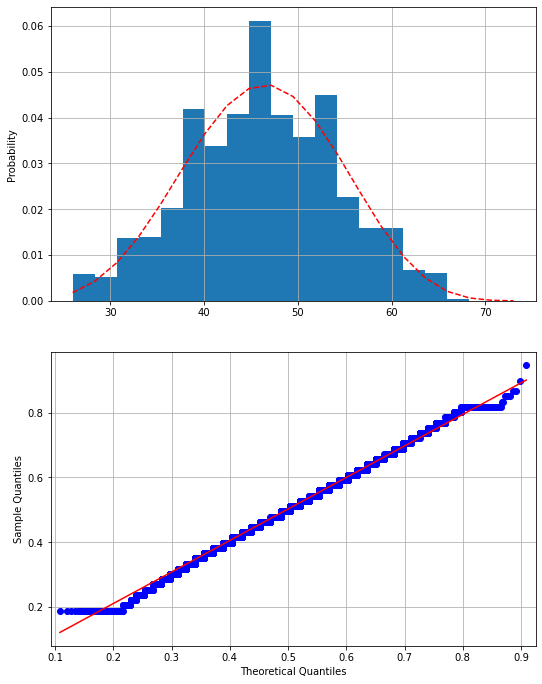

In [75]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(data['Edad'], bins=20, density=True, label='Histograma mediciones')
dist = 'beta'
params = getattr(st, dist).fit(data['Edad'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['Edad'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

#### Simulación de la distribución BETA

In [76]:
samp = st.beta.rvs(*params, size=1000) 
samp.mean(), len(samp)

(46.3376886803815, 1000)

In [77]:
print('La media de las variables aleatorias con distribución BETA es de', samp.mean() )

La media de las variables aleatorias con distribución BETA es de 46.3376886803815


In [78]:
print('La media real de nuestros datos es de', data['Edad'].mean() )

La media real de nuestros datos es de 46.32596030413745


#### Intervalo de Confianza y Error Porcentual

In [79]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = samp

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_edades = np.mean(X)


print('Con una confianza de %2.2f la media del precio promedio por montecarlo crudo, estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del precio promedio' ,media_edades)

error_positivos = abs(np.array(data['Edad'].mean() - media_edades)/media_edades)
porcentaje = error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del precio promedio por montecarlo crudo, estará en el intervalo t normal,
 (45.834880008483736, 46.84049735227926)
Media calculada por montecarlo crudo del precio promedio 46.3376886803815
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.03 %


#### Simulación Montecarlo con Metodo de reducción de varianza para .... cambiar cual fue mejor beta,...

In [80]:
acumulada = st.beta.cdf(samp,*params)
len(acumulada)

1000

In [81]:
np.random.seed(123)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion2 = lambda u: Gen_distr_discreta_(acumulada,samp,1000)
media2 = np.mean(funcion2(u))
media2

46.74872309494379

In [82]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion2(u)

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_edades = media2


print('Con una confianza de %2.2f la media del precio promedio por estratificado, estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por estratificado crudo del precio promedio' ,media_edades)

error_positivos = abs(np.array(data['Edad'].mean() - media_edades)/media_edades)
porcentaje = error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con estratificado fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del precio promedio por estratificado, estará en el intervalo t normal,
 (46.222919948514246, 47.257080573717175)
Media calculada por estratificado crudo del precio promedio 46.74872309494379
El porcentaje de error entre la media real y la media estimada con estratificado fue de 0.9 %
